In [10]:
from vnstock import Listing, Quote, Company, Finance, Trading, Screener, Vnstock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import seaborn as sns


In [43]:
# Get stock data for ACB from VCI source
stock = Vnstock().stock(symbol='ACB', source='VCI')

# Get list of all stocks grouped by their industries
stock_name = stock.listing.symbols_by_industries()

# Display the resulting DataFrame containing stock symbols and their industry classifications
stock_name

,symbol,organ_name,icb_name3,icb_name2,icb_name4,com_type_code,icb_code1,icb_code2,icb_code3,icb_code4
0,ALT,Công ty Cổ phần Văn hóa Tân Bình,Truyền thông,Truyền thông,"Sách, ấn bản & sản phẩm văn hóa",CT,5000,5500,5550,5557
1,APH,Công ty Cổ phần Tập đoàn An Phát Holdings,Hàng công nghiệp,Hàng & Dịch vụ Công nghiệp,Containers & Đóng gói,CT,2000,2700,2720,2723
2,APC,Công ty Cổ phần Chiếu xạ An Phú,Dược phẩm,Y tế,Công nghệ sinh học,CT,4000,4500,4570,4573
3,ASG,Công ty Cổ phần Tập đoàn ASG,Vận tải,Hàng & Dịch vụ Công nghiệp,"Kho bãi, hậu cần và bảo dưỡng",CT,2000,2700,2770,2777
4,CC1,Tổng Công ty Xây dựng số 1 - CTCP,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Xây dựng,CT,2000,2300,2350,2357
...,...,...,...,...,...,...,...,...,...,...
1588,VXP,Công ty Cổ phần Thuốc Thú y Trung ương VETVACO,Hóa chất,Hóa chất,"Sản phẩm hóa dầu, Nông dược & Hóa chất khác",CT,1000,1300,1350,1357
1589,X26,Công ty Cổ phần 26,Hàng cá nhân,Hàng cá nhân & Gia dụng,Hàng May mặc,CT,3000,3700,3760,3763
1590,X77,Công ty Cổ phần Thành An 77,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,CT,2000,2300,2350,2353
1591,CQT,Công ty Cổ phần Xi măng Quán Triều VVMI,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,CT,2000,2300,2350,2353


In [44]:
def rename_stock_columns(df):
    column_mapping = {
        'symbol': 'stock_symbol',
        'organ_name': 'company_name',
        'icb_name3': 'industry',
        'icb_name2': 'sub_industry_group',
        'icb_name4': 'business_sector',
        'com_type_code': 'company_type',
        'icb_code1': 'industry_code',
        'icb_code2': 'sub_industry_code',
        'icb_code': 'sector_code'
    }
    return df.rename(columns=column_mapping)
stock_name = rename_stock_columns(stock_name)
stock_name

,stock_symbol,company_name,industry,sub_industry_group,business_sector,company_type,industry_code,sub_industry_code,icb_code3,icb_code4
0,ALT,Công ty Cổ phần Văn hóa Tân Bình,Truyền thông,Truyền thông,"Sách, ấn bản & sản phẩm văn hóa",CT,5000,5500,5550,5557
1,APH,Công ty Cổ phần Tập đoàn An Phát Holdings,Hàng công nghiệp,Hàng & Dịch vụ Công nghiệp,Containers & Đóng gói,CT,2000,2700,2720,2723
2,APC,Công ty Cổ phần Chiếu xạ An Phú,Dược phẩm,Y tế,Công nghệ sinh học,CT,4000,4500,4570,4573
3,ASG,Công ty Cổ phần Tập đoàn ASG,Vận tải,Hàng & Dịch vụ Công nghiệp,"Kho bãi, hậu cần và bảo dưỡng",CT,2000,2700,2770,2777
4,CC1,Tổng Công ty Xây dựng số 1 - CTCP,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Xây dựng,CT,2000,2300,2350,2357
...,...,...,...,...,...,...,...,...,...,...
1588,VXP,Công ty Cổ phần Thuốc Thú y Trung ương VETVACO,Hóa chất,Hóa chất,"Sản phẩm hóa dầu, Nông dược & Hóa chất khác",CT,1000,1300,1350,1357
1589,X26,Công ty Cổ phần 26,Hàng cá nhân,Hàng cá nhân & Gia dụng,Hàng May mặc,CT,3000,3700,3760,3763
1590,X77,Công ty Cổ phần Thành An 77,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,CT,2000,2300,2350,2353
1591,CQT,Công ty Cổ phần Xi măng Quán Triều VVMI,Xây dựng và Vật liệu,Xây dựng và Vật liệu,Vật liệu xây dựng & Nội thất,CT,2000,2300,2350,2353


In [45]:
# Get unique industry names (icb_name4) from the stock listing data, excluding any null values
unique_icb_name4 = stock_name['industry'].dropna().unique()
unique_icb_name4

array(['Truyền thông', 'Hàng công nghiệp', 'Dược phẩm', 'Vận tải',
       'Xây dựng và Vật liệu', 'Hóa chất', 'Sản xuất thực phẩm',
       'Dịch vụ tài chính', 'Bia và đồ uống',
       'Tư vấn & Hỗ trợ Kinh doanh', 'Phân phối thực phẩm & dược phẩm',
       'Ngân hàng', 'Hàng gia dụng', 'Công nghiệp nặng', 'Bán lẻ',
       'Phần mềm & Dịch vụ Máy tính', 'Sản xuất & Phân phối Điện',
       'Nước & Khí đốt', 'Khai khoáng', 'Du lịch & Giải trí',
       'Hàng cá nhân', 'Thiết bị và Phần cứng', 'Bất động sản',
       'Lâm nghiệp và Giấy', 'Thiết bị và Dịch vụ Y tế',
       'Ô tô và phụ tùng', 'Điện tử & Thiết bị điện', 'Kim loại',
       'Bảo hiểm phi nhân thọ', 'Sản xuất Dầu khí', 'Bảo hiểm nhân thọ',
       'Thiết bị, Dịch vụ và Phân phối Dầu khí', 'Hàng hóa giải trí',
       'Thuốc lá', 'Viễn thông di động', 'Viễn thông cố định'],
      dtype=object)

In [46]:
def print_symbols_by_icb_name4(df):
    """
    Print stock symbols grouped by their industry classification (ICB name4).
    
    This function takes a DataFrame containing stock information and groups the stock symbols
    by their industry classification (icb_name4). It then prints each industry name followed
    by a comma-separated list of stock symbols belonging to that industry.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing stock information with columns 'icb_name4' and 'symbol'
        
    Returns:
    --------
    None
        Prints the grouped symbols to console
    """
    grouped = df.groupby('industry')['stock_symbol'].apply(list)
    for icb_name4, symbols in grouped.items():
        print(f"{icb_name4}: {', '.join(symbols)}")
        
print_symbols_by_icb_name4(stock_name)        

Bia và đồ uống: CPA, BHN, BHP, FGL, BHG, BSP, HAT, HAV, BHK, BSD, CFV, HKT, BHH, EPC, CTP, BBM, HAD, IFS, HNR, HLB, HBH, PCF, BQB, QHW, BSQ, SCD, NAF, BSH, SKH, SAB, SKV, BSL, SBL, SBB, SKN, SMB, BTB, THB, TAN, VCF, SB1, VDL, WSB, VTL
Bán lẻ: CEN, FRT, CPH, CMV, KGM, BTT, COM, HFX, MWG, HTM, PET, PIT, HTT, DKC, DGW, PSD, SAS, SBV, AST, THS, TOP, TV6
Bảo hiểm nhân thọ: BVH
Bảo hiểm phi nhân thọ: ABI, BHI, BLI, BMI, BIC, MIG, PRE, PVI, PTI, PGI, AIC, VNR
Bất động sản: LEC, DXS, HDC, TCH, HPI, FIR, DCH, BCM, HRB, HTN, CK8, HU6, HD8, CKG, AAV, IDC, IDV, CEO, AMD, BSC, CCL, KAC, KBC, KHG, DXG, KOS, CRE, PRT, SSH, LSG, LHG, LGL, BIG, HDG, CLG, MA1, MBT, XDH, HPX, API, NBB, FDC, MGR, C21, NDN, NRC, DRH, NVL, HAR, BII, NTB, NTC, NTL, FLC, NVT, AGG, D11, PDR, EFI, D2D, MH3, HLD, PIV, BVL, PLA, PPI, HQC, KDH, ITC, DTA, LDG, IJC, DIG, IDJ, HD6, ITA, KSF, LMH, PTL, DTD, PV2, HD2, PVL, PWA, QCG, RCL, TBR, PXA, PXL, SJS, VHM, SZG, NLG, PXC, PVR, SID, SGR, VC3, SCR, SIP, SZC, TEG, STL, TID, TAL, SZB,

In [53]:
# Filter DataFrame to get stocks in the Oil & Gas Equipment & Services industry
oil_and_gas_stocks = stock_name[stock_name['industry'] == "Thiết bị, Dịch vụ và Phân phối Dầu khí"]

# Extract the list of stock symbols
oil_and_gas_symbols = oil_and_gas_stocks['stock_symbol'].tolist()

# Display the list of stock symbols
print("Stocks in Oil & Gas Equipment & Services industry:")
oil_and_gas_symbols

Stocks in Oil & Gas Equipment & Services industry:


['TOS', 'PTV', 'PEQ', 'POS', 'PVD', 'PVB', 'PVE', 'PVS', 'PVC']

In [54]:
def get_stock_data(symbols, start_date, end_date, interval="1D"):
    """
    Fetch historical stock data for multiple symbols and save to CSV files
    
    Parameters:
    -----------
    symbols : list
        List of stock symbols 
    start_date : str
        Start date in 'YYYY-MM-DD' format
    end_date : str
        End date in 'YYYY-MM-DD' format
    interval : str, default='1D'
        Time interval for data ('1D' for daily, '1W' for weekly, etc.)
    
    Returns:
    --------
    dict
        Dictionary containing DataFrames for each symbol
    """
    data_dict = {}
    
    for symbol in symbols:
        quote = Quote(symbol=symbol, source="VCI")
        df = quote.history(start=start_date, end=end_date, interval=interval)
        data_dict[symbol] = df
       # Save to CSV with dynamic filename
        filename = f"../data/{symbol}.csv"
        df.to_csv(filename)
        print(f"Saved data for {symbol} to {filename}")
    
    return data_dict

# Example usage:
symbols = oil_and_gas_symbols
data = get_stock_data(symbols, "2025-01-01", "2025-05-10")

Saved data for TOS to ../data/TOS.csv
Saved data for PTV to ../data/PTV.csv
Saved data for PEQ to ../data/PEQ.csv
Saved data for POS to ../data/POS.csv
Saved data for PVD to ../data/PVD.csv
Saved data for PVB to ../data/PVB.csv
Saved data for PVE to ../data/PVE.csv
Saved data for PVS to ../data/PVS.csv
Saved data for PVC to ../data/PVC.csv


In [55]:
#import data
df = pd.read_csv("../data/PVD.csv")

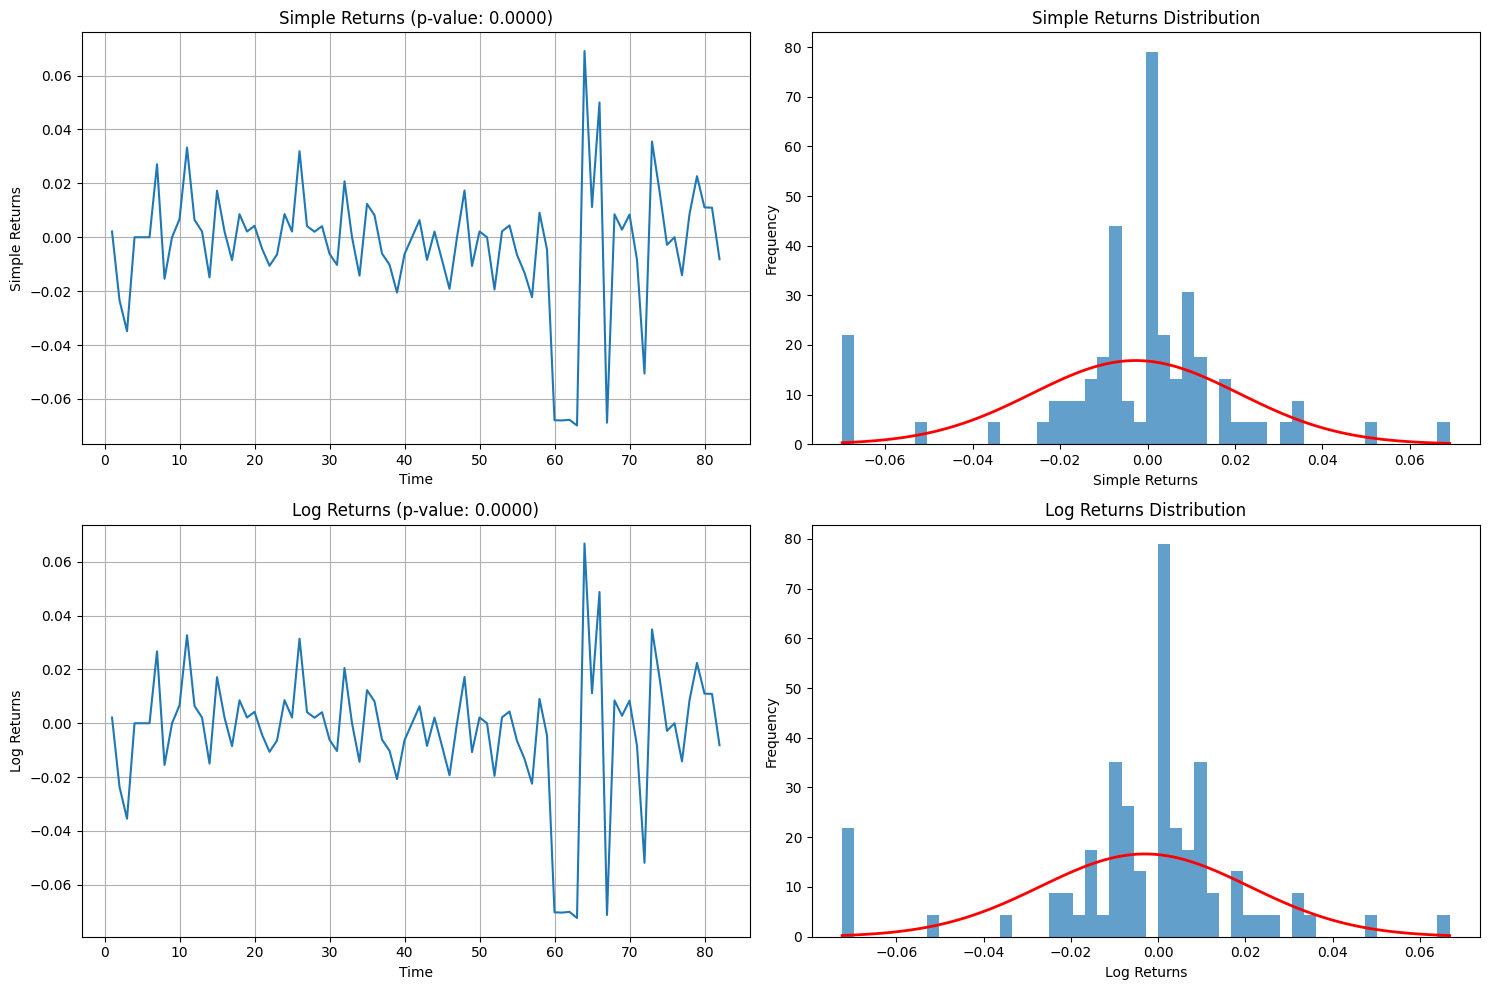

Simple returns ADF test p-value: 0.0000
Log returns ADF test p-value: 0.0000

Interpretation:
p-value < 0.05 indicates stationarity
p-value >= 0.05 indicates non-stationarity


In [56]:
def analyze_stock_returns(df):
    """
    Analyze and visualize stock returns before and after log transformation
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing stock data with 'close' column
    """
    # Sort data by time
    df = df.sort_values(by="time")
    
    # Calculate simple returns and log returns
    df['simple_return'] = df['close'].pct_change()
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))
    simple_returns = df['simple_return'].dropna()
    log_returns = df['log_return'].dropna()
    
    # Perform stationarity tests
    simple_test = adfuller(simple_returns)
    simple_pvalue = simple_test[1]
    
    log_test = adfuller(log_returns)
    log_pvalue = log_test[1]
    
    # Create figure with 2x2 subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot simple returns
    ax1.plot(simple_returns)
    ax1.set_title(f'Simple Returns (p-value: {simple_pvalue:.4f})')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Simple Returns')
    ax1.grid(True)
    
    # Plot simple returns histogram with normal curve
    ax2.hist(simple_returns, bins=50, density=True, alpha=0.7)
    x = np.linspace(simple_returns.min(), simple_returns.max(), 100)
    mu = simple_returns.mean()
    sigma = simple_returns.std()
    ax2.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
    ax2.set_title('Simple Returns Distribution')
    ax2.set_xlabel('Simple Returns')
    ax2.set_ylabel('Frequency')
    
    # Plot log returns
    ax3.plot(log_returns)
    ax3.set_title(f'Log Returns (p-value: {log_pvalue:.4f})')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Log Returns')
    ax3.grid(True)
    
    # Plot log returns histogram with normal curve
    ax4.hist(log_returns, bins=50, density=True, alpha=0.7)
    x = np.linspace(log_returns.min(), log_returns.max(), 100)
    mu = log_returns.mean()
    sigma = log_returns.std()
    ax4.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
    ax4.set_title('Log Returns Distribution')
    ax4.set_xlabel('Log Returns')
    ax4.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Print stationarity test results
    print(f"Simple returns ADF test p-value: {simple_pvalue:.4f}")
    print(f"Log returns ADF test p-value: {log_pvalue:.4f}")
    print("\nInterpretation:")
    print("p-value < 0.05 indicates stationarity")
    print("p-value >= 0.05 indicates non-stationarity")
    
    return log_returns

# Example usage:
returns = analyze_stock_returns(df)

In [57]:
def adf_test(series):
    """
    Perform Augmented Dickey-Fuller (ADF) test for stationarity
    
    Parameters:
    -----------
    series : pd.Series
        Time series data (log returns or simple returns)
    
    Returns:
    --------
    dict : {
        'test_statistic': float,
        'p_value': float,
        'is_stationary': bool
    }
    """
    result = adfuller(series.dropna())
    stats = {
        'test_statistic': result[0],
        'p_value': result[1],
        'is_stationary': result[1] < 0.05
    }
    
    # Print results
    print("\nAugmented Dickey-Fuller Test Results:")
    print(f"Test Statistic: {stats['test_statistic']:.4f}")
    print(f"p-value: {stats['p_value']:.4f}")
    print(f"Stationary: {'Yes' if stats['is_stationary'] else 'No'}")
    
    return stats


def describe_statistics(series):
    """
    Calculate basic statistical measures for the time series
    
    Parameters:
    -----------
    series : pd.Series
        Time series data
    
    Returns:
    --------
    dict : {
        'mean': float,
        'std': float,
        'skew': float,
        'kurtosis': float
    }
    """
    stats = {
        'mean': series.mean(),
        'std': series.std(),
        'skew': series.skew(),
        'kurtosis': series.kurtosis()
    }
    
    # Print results
    print("\nStatistical Measures:")
    print(f"Mean: {stats['mean']:.6f}")
    print(f"Standard Deviation: {stats['std']:.6f}")
    print(f"Skewness: {stats['skew']:.4f}")
    print(f"Kurtosis: {stats['kurtosis']:.4f}")
    
    return stats

# Example usage:
# Call the functions with your data
adf_results = adf_test(returns)
stats_results = describe_statistics(returns)



Augmented Dickey-Fuller Test Results:
Test Statistic: -5.7910
p-value: 0.0000
Stationary: Yes

Statistical Measures:
Mean: -0.003024
Standard Deviation: 0.023977
Skewness: -0.9417
Kurtosis: 3.0015


In [59]:
df

,Unnamed: 0,time,open,high,low,close,volume
0,0,2025-01-02,23.50,23.65,23.40,23.45,1618100
1,1,2025-01-03,23.65,23.90,23.40,23.50,3512100
2,2,2025-01-06,23.65,23.80,22.90,22.95,3178300
3,3,2025-01-07,23.00,23.15,21.95,22.15,5499300
4,4,2025-01-08,22.15,22.40,21.70,22.15,3840400
...,...,...,...,...,...,...,...
78,78,2025-05-05,17.50,17.65,16.80,17.65,5047100
79,79,2025-05-06,17.75,18.50,17.75,18.05,7367300
80,80,2025-05-07,18.20,18.60,18.05,18.25,6375600
81,81,2025-05-08,18.35,18.90,18.05,18.45,8213000


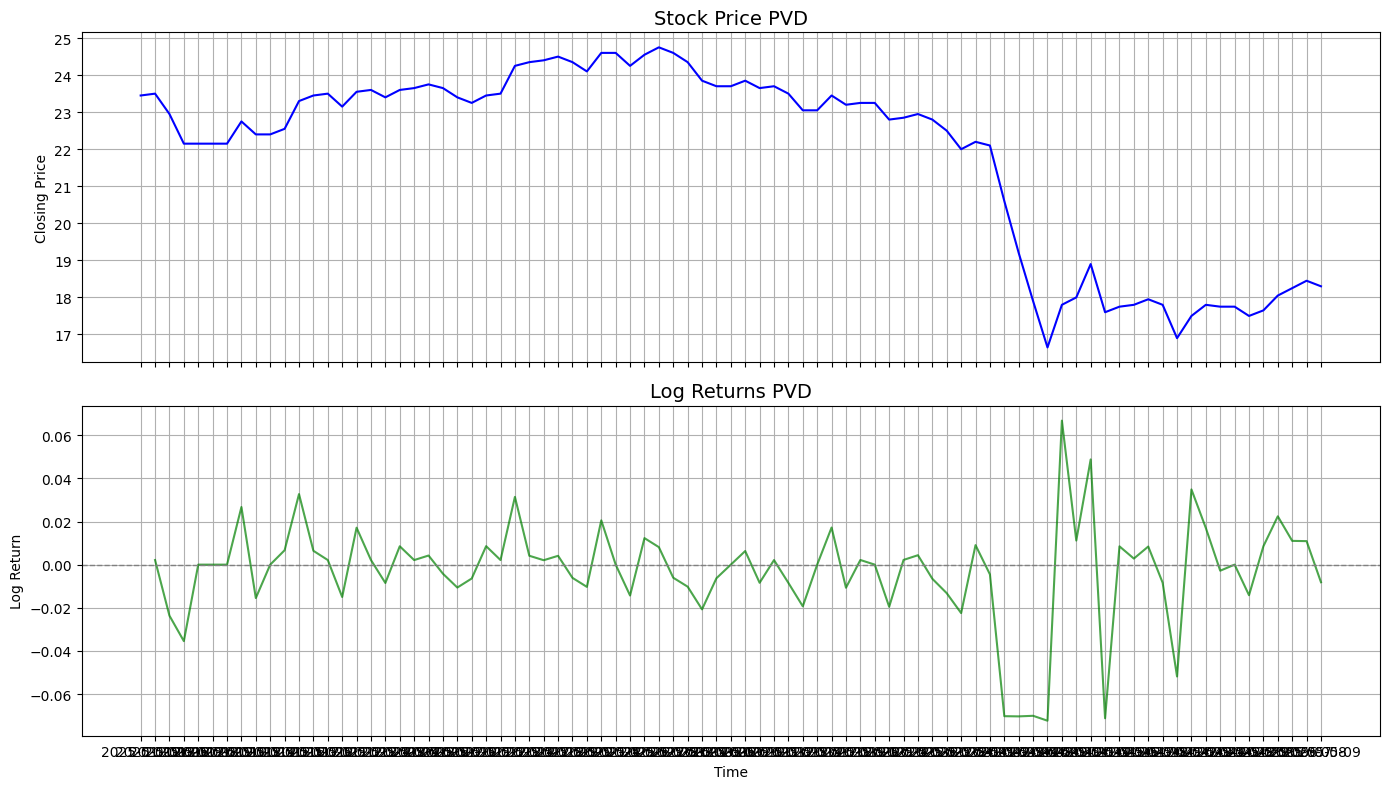

In [61]:
# Visualization and log_return

def visualize_price_and_returns(df, symbol="Stock"):
    """
    Plot price and log return charts
    """
    df = df.sort_values("time").copy()
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))

    fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    # Price chart
    axs[0].plot(df["time"], df["close"], color='blue')
    axs[0].set_title(f'Stock Price {symbol}', fontsize=14)
    axs[0].set_ylabel('Closing Price')
    axs[0].grid(True)

    # Log return chart
    axs[1].plot(df["time"], df["log_return"], color='green', alpha=0.7)
    axs[1].axhline(0, color='gray', lw=1, linestyle='--')
    axs[1].set_title(f'Log Returns {symbol}', fontsize=14)
    axs[1].set_ylabel('Log Return')
    axs[1].set_xlabel('Time')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

visualize_price_and_returns(df,symbol="PVD")

In [62]:
mu_r = returns.mean()
sigma_r = returns.std()
print(f"Profit_expected_day: {mu_r*252:.6f}")
print(f"Standard_dev_day: {sigma_r*np.sqrt(252):.6f}")


Profit_expected_day: -0.762052
Standard_dev_day: 0.380622


In [63]:
def monte_carlo_simulation(df, mu_r, sigma_r, days_list=[15, 16, 20, 180, 252], simulations=1000000):
    """
    Perform Monte Carlo simulation for multiple time horizons
    
    Parameters:
    -----------
    df : DataFrame
        Input dataframe containing price data
    mu_r : float
        Mean of log returns
    sigma_r : float
        Standard deviation of log returns
    days_list : list
        List of days to simulate
    simulations : int
        Number of simulations to run
        
    Returns:
    --------
    dict
        Dictionary containing results for each time horizon
    """
    start_price = df['close'].iloc[-1]
    results = {}
    
    for days in days_list:
        # Simulate random log returns
        simulated_returns = np.random.normal(mu_r, sigma_r, (simulations, days))
        
        # Calculate future prices from log returns
        price_paths = start_price * np.exp(np.cumsum(simulated_returns, axis=1))
        final_prices = price_paths[:, -1]
        returns = (final_prices - start_price) / start_price
        
        # Calculate statistics
        results[days] = {
            'expected_return': np.mean(returns),
            'risk': np.std(returns),
            'VaR_5': np.percentile(returns, 5),
            'price_paths': price_paths
        }
        
        # Print results
        print(f"\nResults for {days} days:")
        print(f"Expected Return: {results[days]['expected_return']:.2%}")
        print(f"Risk (Standard Deviation): {results[days]['risk']:.2%}")
        print(f"Value-at-Risk (VaR 5%): {results[days]['VaR_5']:.2%}")
    
    return results

# Example usage:
results = monte_carlo_simulation(df, mu_r, sigma_r)


Results for 15 days:
Expected Return: -4.02%
Risk (Standard Deviation): 8.93%
Value-at-Risk (VaR 5%): -17.96%

Results for 16 days:
Expected Return: -4.28%
Risk (Standard Deviation): 9.20%
Value-at-Risk (VaR 5%): -18.62%

Results for 20 days:
Expected Return: -5.31%
Risk (Standard Deviation): 10.18%
Value-at-Risk (VaR 5%): -21.06%

Results for 180 days:
Expected Return: -38.90%
Risk (Standard Deviation): 20.17%
Value-at-Risk (VaR 5%): -65.79%

Results for 252 days:
Expected Return: -49.82%
Risk (Standard Deviation): 19.79%
Value-at-Risk (VaR 5%): -75.05%


In [64]:
def monte_carlo_compare(data_dict, days=30, simulations=100000):
    """
    Run Monte Carlo simulation for multiple stock symbols and compare results

    Parameters:
    -----------
    data_dict : dict
        Dictionary containing DataFrames from get_stock_data
    days : int
        Number of days to simulate (default 252 days = 1 year)
    simulations : int
        Number of simulations per stock symbol

    Returns:
    --------
    pd.DataFrame
        Comparison results for stocks: return, risk, VaR 5%
    """
    results = []

    for symbol, df in data_dict.items():
        df = df.sort_values("time").copy()
        df['log_return'] = np.log(df['close'] / df['close'].shift(1))
        returns = df['log_return'].dropna()

        mu_r = returns.mean()
        sigma_r = returns.std()
        start_price = df['close'].iloc[-1]

        # Simulate
        simulated_returns = np.random.normal(mu_r, sigma_r, (simulations, days))
        price_paths = start_price * np.exp(np.cumsum(simulated_returns, axis=1))
        final_prices = price_paths[:, -1]
        future_returns = ((final_prices - start_price) / start_price)*100

        results.append({
            'Symbol': symbol,
            'Expected Return': np.mean(future_returns),
            'Risk (Std Dev)': np.std(future_returns),
            'VaR 5%': np.percentile(future_returns, 5),
            'Current Price': start_price
        })

    return pd.DataFrame(results).sort_values("Expected Return", ascending=False)


In [65]:
# Run Monte Carlo simulation for 30 days with 100,000 simulations per stock
compare_df = monte_carlo_compare(data_dict=data, days=30, simulations=100000)

# Display results sorted by expected return
print("\nMonte Carlo Simulation Results (30-day horizon):")
print("===============================================")
print(compare_df.to_string(index=False))



Monte Carlo Simulation Results (30-day horizon):
Symbol  Expected Return  Risk (Std Dev)     VaR 5%  Current Price
   TOS        32.508113       37.366020 -19.029569         144.30
   PEQ        13.832444       36.377251 -35.019663          47.45
   PTV         2.040392       20.666332 -28.096627           4.00
   PVE         0.945945       45.125858 -54.271069           2.30
   POS         0.105566       26.778800 -37.284894          17.70
   PVB        -3.324276       16.715672 -28.172083          26.30
   PVC        -4.250037       15.689208 -27.697351           9.00
   PVS        -7.354846       14.166283 -28.650089          26.60
   PVD        -7.858064       12.137926 -26.402950          18.30


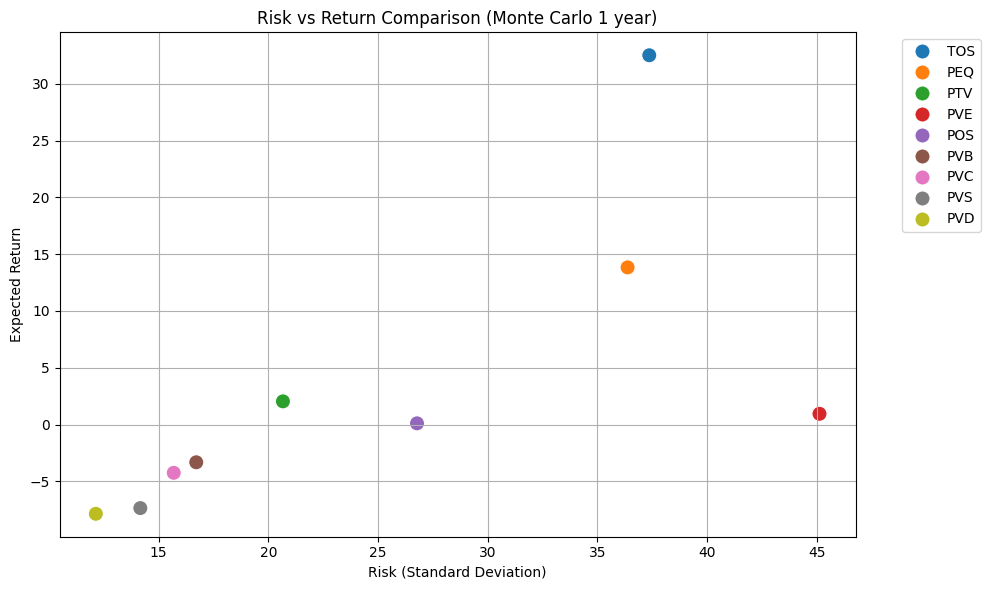

In [66]:
def plot_risk_return(df):
    """
    Plot scatter chart: Expected Return vs Risk
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Risk (Std Dev)', y='Expected Return', hue='Symbol', s=120)
    plt.title('Risk vs Return Comparison (Monte Carlo 1 year)')
    plt.xlabel('Risk (Standard Deviation)')
    plt.ylabel('Expected Return')
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_risk_return(compare_df)


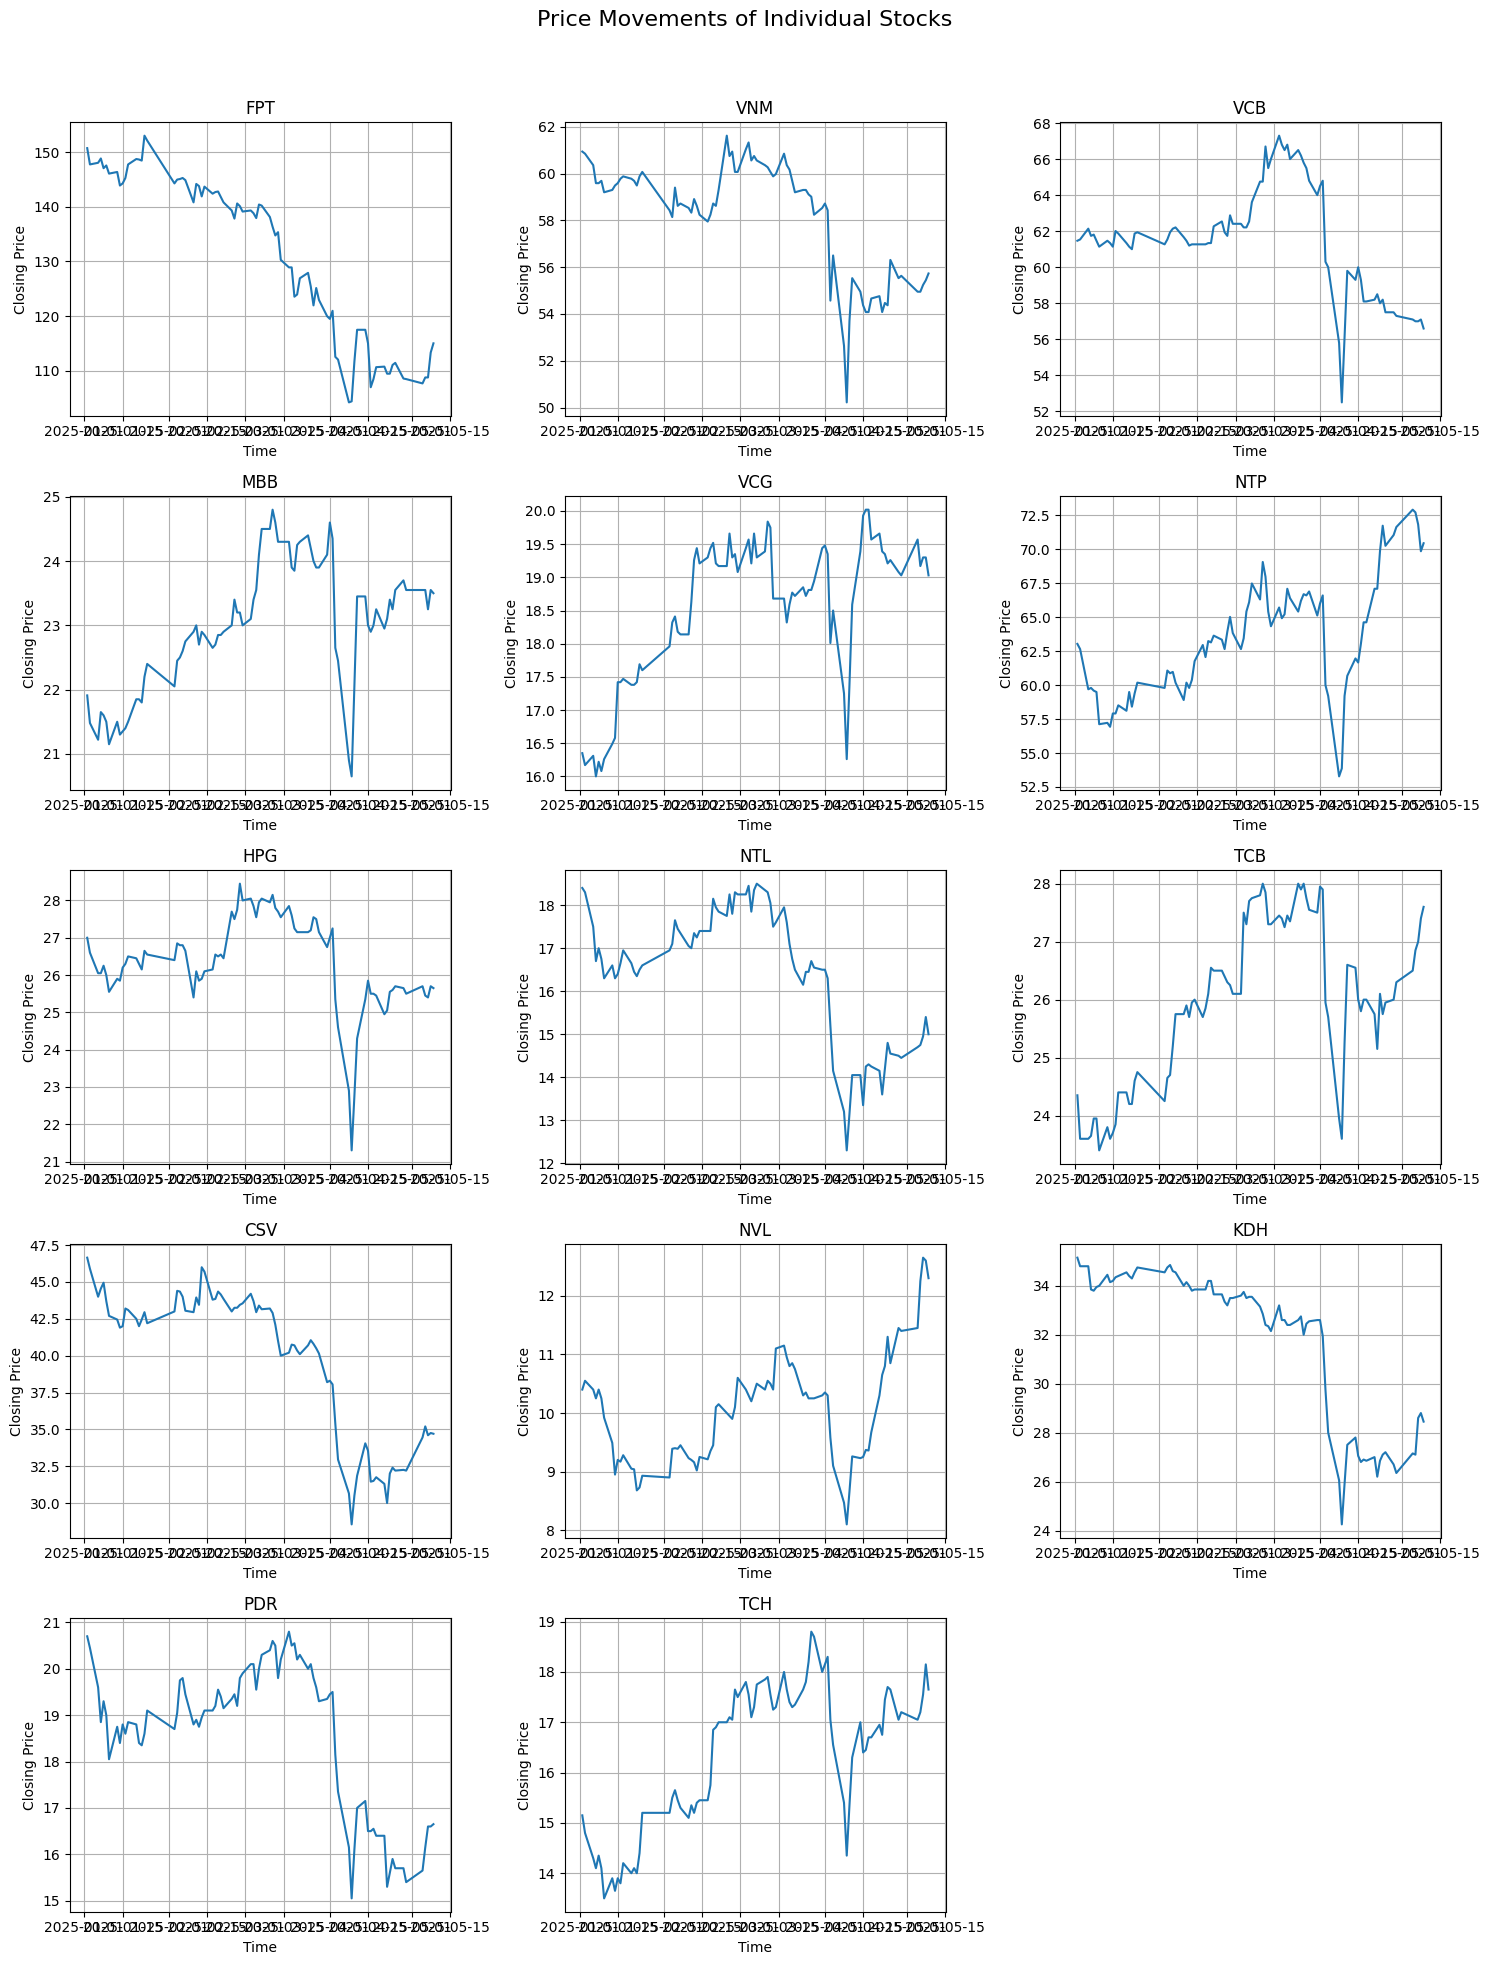

In [14]:
def plot_individual_stocks(data_dict, cols=3):
    """
    Plot price movements for each stock, one subplot per symbol

    Parameters:
    -----------
    data_dict : dict
        Dictionary containing stock DataFrames
    cols : int
        Number of columns in subplot layout
    """
    import math

    total = len(data_dict)
    rows = math.ceil(total / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=False)
    axes = axes.flatten()  # for easier handling

    for idx, (symbol, df) in enumerate(data_dict.items()):
        ax = axes[idx]
        df_sorted = df.sort_values("time")
        ax.plot(df_sorted['time'], df_sorted['close'], label=symbol)
        ax.set_title(symbol)
        ax.set_xlabel("Time")
        ax.set_ylabel("Closing Price")
        ax.grid(True)

    # Hide empty subplots (if number of symbols is not divisible)
    for i in range(len(data_dict), len(axes)):
        fig.delaxes(axes[i])

    plt.suptitle("Price Movements of Individual Stocks", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for title
    plt.show()
plot_individual_stocks(data, cols=3)  # Or cols=3 if you want a different layout
